In [1]:
import seaborn as sns
import pandas as pd
pd.set_option('mode.chained_assignment',None)
sns.set_theme({'figure.figsize':(15,10)})

In [2]:
df_preds = pd.read_csv('../spims-dump.pred.csv')
df_preds.head(10)

,tok_idx,layer_idx,I,S,T,F,C,func,source,target
0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
2,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
3,3,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
4,4,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
5,0,1,0.310381,0.000707,0.211581,0.343611,0.133721,spim,Reprise de la session,Resumed session
6,1,1,0.380822,0.002276,0.093817,0.444666,0.078418,spim,Reprise de la session,Resumed session
7,2,1,0.265410,-0.000016,0.066876,0.607378,0.060351,spim,Reprise de la session,Resumed session
8,3,1,0.184576,0.090787,0.051892,0.611787,0.060958,spim,Reprise de la session,Resumed session
9,4,1,0.371161,-0.035855,0.091582,0.453715,0.119398,spim,Reprise de la session,Resumed session


In [3]:
sub_dfs_preds = []
for term in 'ISTFC':
    sub_df = df_preds[['layer_idx', term, 'func']]
    sub_df['term'] = term
    sub_df['metric'] = sub_df[term]
    del sub_df[term]
    sub_dfs_preds.append(sub_df)
melt_preds = pd.concat(sub_dfs_preds)
melt_preds.sample(10)

,layer_idx,func,term,metric
921407,0,l2,I,0.000000
466868,5,cosine,T,0.525873
502233,2,l2,S,13.459297
852853,6,cosine,S,-0.092324
1223554,0,spim,T,0.000000
703324,1,norm_ratio,T,5.941666
67003,2,l2,T,10.363939
549022,2,l2,C,12.790767
294508,1,cosine,F,0.892920
1033025,0,spim,C,0.000000


<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

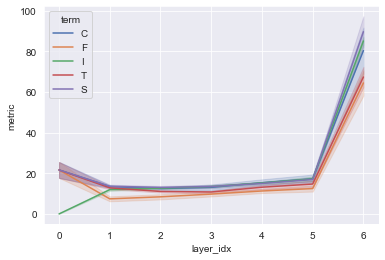

In [4]:
sns.set_theme({'figure.figsize':(15,10)})
sns.lineplot(x='layer_idx', y='metric', hue='term', data=melt_preds[melt_preds.func == 'l2'].sample(frac=1.0).reset_index(), ci='sd')

<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

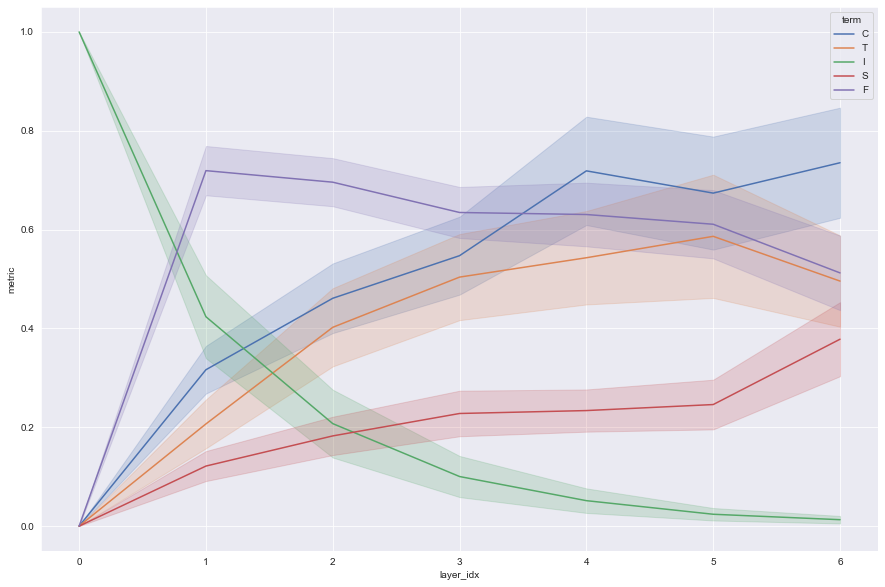

In [5]:
sns.set_theme({'figure.figsize':(15,10)})
nr_melt = melt_preds[melt_preds.func == 'norm_ratio']
nr_melt.metric = 1 / nr_melt.metric
sns.lineplot(x='layer_idx', y='metric', hue='term', data=nr_melt.sample(frac=1.0).reset_index(), ci='sd')

<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

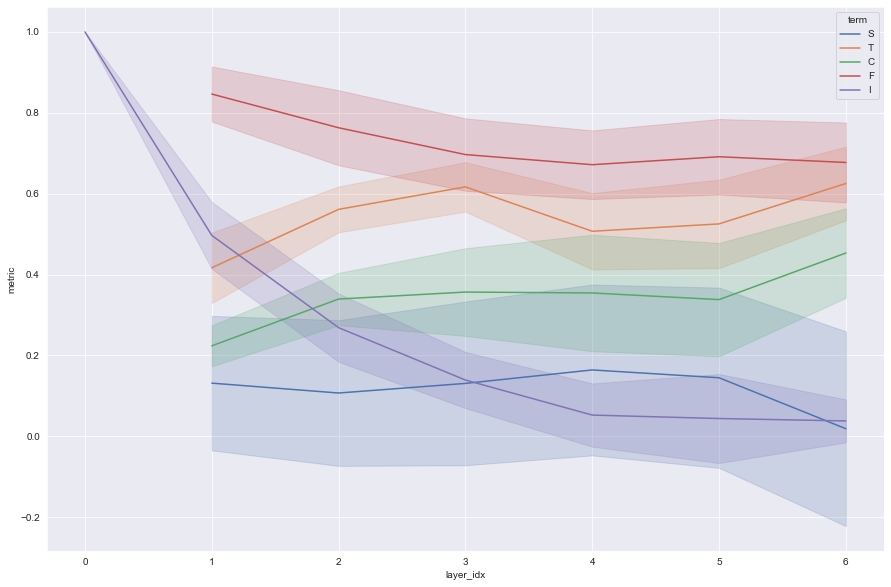

In [6]:
sns.set_theme({'figure.figsize':(15,10)})
sns.lineplot(x='layer_idx', y='metric', hue='term', data=melt_preds[melt_preds.func == 'cosine'].sample(frac=1.0).reset_index(), ci='sd')

In [7]:
df_gold = pd.read_csv('../spims-dump.gold.csv')
df_gold.head(10)

,tok_idx,layer_idx,I,S,T,F,C,func,source,target
0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
2,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
3,3,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
4,4,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
5,5,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
6,6,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
7,0,1,0.310381,0.000707,0.211581,0.343611,0.133721,spim,Reprise de la session,Resumption of the session
8,1,1,0.356254,-0.008910,0.167717,0.389704,0.095236,spim,Reprise de la session,Resumption of the session
9,2,1,0.280524,-0.004883,0.067926,0.591911,0.064522,spim,Reprise de la session,Resumption of the session


In [8]:
sub_dfs_gold = []
for term in 'ISTFC':
    sub_df = df_gold[['layer_idx', term, 'func']]
    sub_df['term'] = term
    sub_df['metric'] = sub_df[term]
    del sub_df[term]
    sub_dfs_gold.append(sub_df)
melt_gold = pd.concat(sub_dfs_gold)
melt_gold.sample(10)

,layer_idx,func,term,metric
570606,1,l2,C,13.881488
793497,2,norm_ratio,F,1.282349
1103171,6,spim,S,-0.018420
258454,3,cosine,S,0.121107
98876,4,spim,I,0.003847
1039437,5,norm_ratio,S,5.618116
706565,1,norm_ratio,F,1.355305
1202965,0,cosine,T,NaN
213824,1,spim,F,0.561211
816884,4,l2,C,12.880066


<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

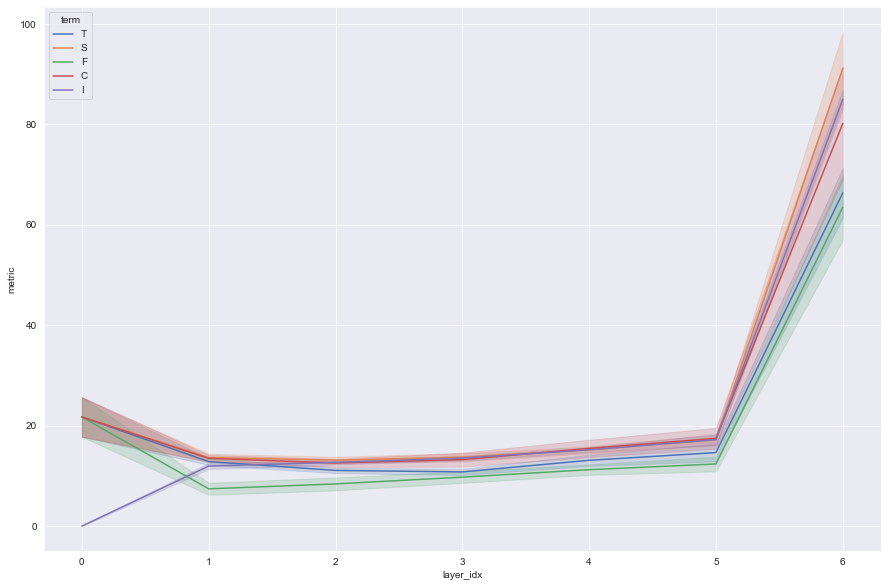

In [9]:
sns.set_theme({'figure.figsize':(15,10)})
sns.lineplot(x='layer_idx', y='metric', hue='term', data=melt_gold[melt_gold.func == 'l2'].sample(frac=1.0).reset_index(), ci='sd')

<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

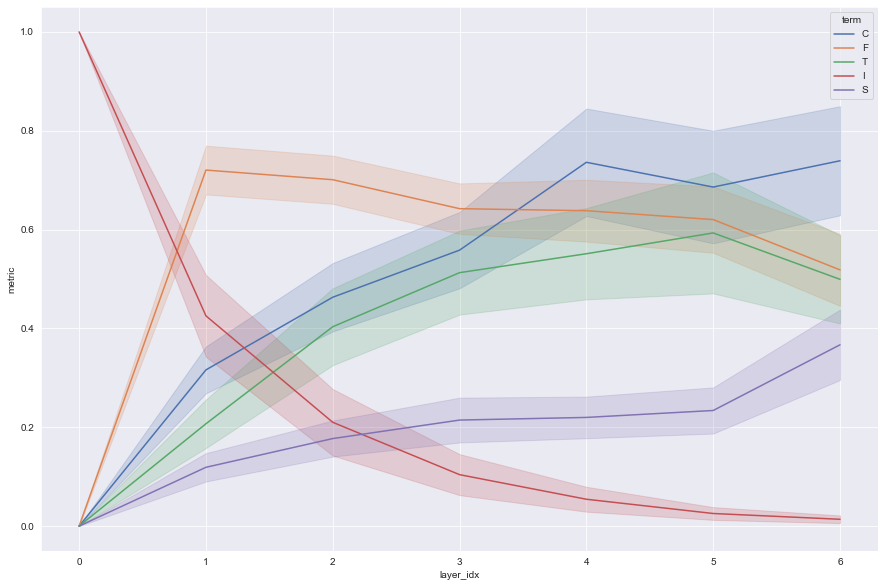

In [10]:
sns.set_theme({'figure.figsize':(15,10)})
nr_melt = melt_gold[melt_gold.func == 'norm_ratio']
nr_melt.metric = 1 / nr_melt.metric
sns.lineplot(x='layer_idx', y='metric', hue='term', data=nr_melt.sample(frac=1.0).reset_index(), ci='sd')

<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

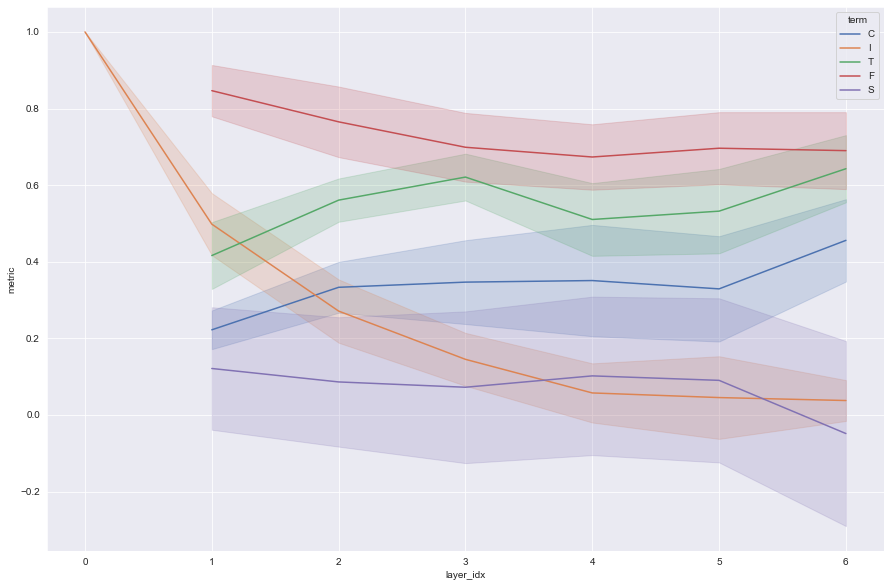

In [11]:
sns.set_theme({'figure.figsize':(15,10)})
sns.lineplot(x='layer_idx', y='metric', hue='term', data=melt_gold[melt_gold.func == 'cosine'].sample(frac=1.0).reset_index(), ci='sd')